In [1]:
import os
import matplotlib.pyplot as plt

log_dir = r"C:\Users\pinky\Downloads\ACM_Workshop_SYSML-main (1)\ACM_Workshop_SYSML-main\results\random_CNN_model_CIFAR10_dirichlet0.05_12"

# Find all .log files
log_files = [f for f in os.listdir(log_dir) if f.endswith(".log")]
log_files.sort(reverse=True)  # Sorts with latest (by name) on top

if not log_files:
    raise FileNotFoundError("No .log files found!")

latest_log = os.path.join(log_dir, log_files[0])
print(f"📄 Using log file: {latest_log}")

with open(latest_log, "r") as f:
    lines = f.readlines()

# Extract accuracy and training time
accs = []
times = []
for line in lines:
    if "GLOBAL MODEL: Total Accuracy" in line:
        acc = float(line.strip().split('=')[-1])
        accs.append(acc)
    elif "TOTAL_ACTUAL_TRAINING_TIME" in line:
        t = float(line.strip().split(':')[-1])
        times.append(t)


📄 Using log file: C:\Users\pinky\Downloads\ACM_Workshop_SYSML-main (1)\ACM_Workshop_SYSML-main\results\random_CNN_model_CIFAR10_dirichlet0.05_12\14-06-2025 23-14-16.log


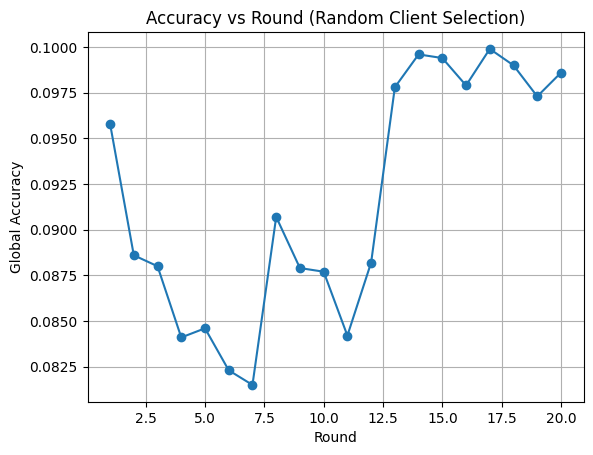

In [2]:
plt.plot(range(1, len(accs) + 1), accs, marker="o")
plt.title("Accuracy vs Round (Random Client Selection)")
plt.xlabel("Round")
plt.ylabel("Global Accuracy")
plt.grid(True)
plt.show()


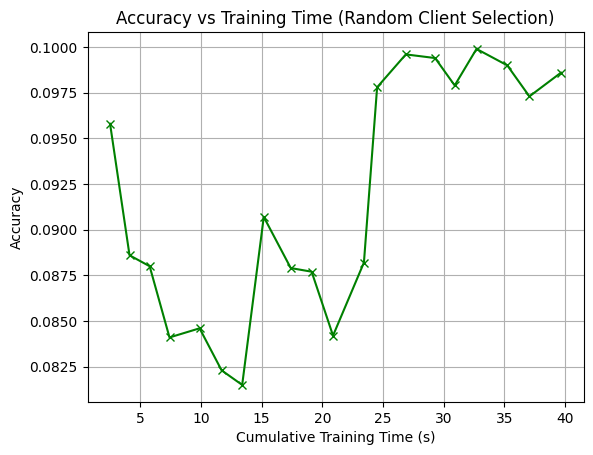

In [3]:
plt.plot(times, accs, marker="x", color='green')
plt.title("Accuracy vs Training Time (Random Client Selection)")
plt.xlabel("Cumulative Training Time (s)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [ ]:
# Add moving average column
df['accuracy_moving_avg'] = df['accuracy'].rolling(window=5).mean()

# Plot
plt.figure(figsize=(8, 4))
plt.plot(df['round'], df['accuracy'], label='Raw Accuracy', alpha=0.4, linestyle='--')
plt.plot(df['round'], df['accuracy_moving_avg'], label='Moving Avg (window=5)', color='blue')
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Round (with Moving Average)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from collections import Counter

# Flatten list of selected clients
all_selected_clients = [cid for round_clients in selected_clients_per_round for cid in round_clients]

# Count how many times each client was selected
client_counts = Counter(all_selected_clients)
num_clients = max(client_counts) + 1  # assuming IDs are 0-indexed

# Ensure all clients are included (even if selected 0 times)
selections = [client_counts.get(cid, 0) for cid in range(num_clients)]

# Compute Jain's Fairness Index
numerator = sum(selections)**2
denominator = len(selections) * sum(x**2 for x in selections)
jain_index = numerator / denominator if denominator != 0 else 0

print(f"Jain's Fairness Index: {jain_index:.4f}")

# Optional: Plot participation histogram
plt.figure(figsize=(8, 4))
plt.bar(range(num_clients), selections, color='teal')
plt.xlabel("Client ID")
plt.ylabel("Rounds Participated")
plt.title("Client Participation Across Rounds")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
# Find target accuracy from both notebooks externally or pass as constant
target_accuracy = 0.099  # example, set this as min of both methods' max accuracy

# Find round where target is reached
rounds_to_target = df[df['accuracy'] >= target_accuracy]['round'].min()
print(f"Rounds to reach target accuracy ({target_accuracy}): {rounds_to_target}")


In [ ]:
# Assuming you saved these from both notebooks:
rounds_random = 18
avg_time_random = df_random[['total_training_time', 'validation_time', 'aggregation_time']].sum(axis=1).mean()

rounds_smart = 14
avg_time_smart = df_smart[['total_training_time', 'validation_time', 'aggregation_time']].sum(axis=1).mean()

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(avg_time_random, rounds_random, label='Random', color='orange', s=80)
plt.scatter(avg_time_smart, rounds_smart, label='Smart', color='green', s=80)
plt.xlabel("Average Round Time (seconds)")
plt.ylabel("Rounds to Target Accuracy")
plt.title("Efficiency: Rounds vs Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
